In [1]:
# project: p1
# submitter: ejrobles
# partner: none
# hours: 8

In [2]:
# import statements

In [3]:
#Q1
type(7/2)

float

In [4]:
#Q2
x = 4
maximum = 10
minimum = 5
error = x > 10 or x < 5 # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#Q3
word = "KAFKAESQUE"
suffix = "esque"
word_low = word.lower()
last_char = word_low[-5:]

suffix_match = suffix == last_char # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
#Q4
def check_sum(x=0, y=0, sum_value=0):
    return x + y == sum_value
check_sum(0.1,0.2,0.3)

False

In [7]:
#Q5
check_sum(-1,1)

True

In [8]:
#Q6
x = 4
if (x % 2) != 0:
    status = "odd"
elif (x % 2) == 0:
    status = "even"
else:
    status = "non-integer"
status

'even'

In [9]:
#Q7
nums = [3, 4, 1, 6]
for x in nums:
    print(x)
    
def smart_sum(nums):
    sum = 0;
    for num in nums:
        if num < 0:
            continue
        sum += num
        if sum > 20:
            break
    return sum

smart_sum(nums)

3
4
1
6


14

In [10]:
#Q8
smart_sum([2,1,-11,3,15,-1,8,2])

21

In [11]:
#Q9
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7, "w": 6}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [12]:
#Q10
value_x = rows[0][-1]["x"]
value_x

8

In [13]:
#Q11
import copy
v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404 # second change
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [14]:
#Q12
b_index = header.index("B")
sum_b_column = sum(row[b_index] for row in rows)

sum_b_column

412

In [15]:
#Q13
rows.sort(key=lambda row: row[b_index])
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [16]:
#Q14
import json

with open("/home/erobl/cs320/projects/p1/usd.json", 'r') as f:
    usd_data = json.load(f)
cad_rate = usd_data['cad']['rate']


usd_amount = 1000
cad_equivalent = round(usd_amount * cad_rate, 2)
cad_equivalent

def divide(numerator, denominator):
    try:
        return numerator / denominator
    except ZeroDivisionError:
        return float("nan")
cad_equivalent

1345.8

In [17]:
#Q15
divide(3,2)

1.5

In [18]:
#Q16
divide(0,0)

nan

In [19]:
#Q17
import os
import pandas as pd

directory_path = "/home/erobl/cs320/projects/p1/home-computers"
years = {}

for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        year = int(filename.split('.')[0][-4:])
        file_path = os.path.join(directory_path, filename)
        
        df = pd.read_csv(file_path, skiprows = 1).set_index("Geographic Area Name")
        years[year] = df
        
sorted_keys = sorted(years.keys())
sorted_keys


[2017, 2018, 2019, 2020, 2021]

In [20]:
#Q18
df = years[2021]
df.iat[49, 1] # iat works like df.iloc[, 1], but is faster for one cell

2401818

In [21]:
#Q19
no_computer_2021 = years[2021]["Estimate!!Total!!No Computer"].sum()
no_computer_2021

8902093

In [22]:
#Q20
moes = years[2021]["Margin of Error!!Total!!No Computer"]
estimates = years[2021]["Estimate!!Total!!No Computer"]

fractions = moes / estimates
max_fraction = fractions.max()

max_fraction

0.07836701790752577

In [23]:
#Q21
states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
percentages = {}
for state in states:
    no_computer_estimate = years[2021].at[state, "Estimate!!Total!!No Computer"]
    total_estimate = years[2021].at[state, "Estimate!!Total"]
    
    percentage = (no_computer_estimate / total_estimate) * 100
    percentages[state] = round(percentage, 2)

percentages

{'Illinois': 7.35,
 'Indiana': 8.3,
 'Iowa': 8.3,
 'Michigan': 7.58,
 'Minnesota': 6.18,
 'Wisconsin': 8.03}

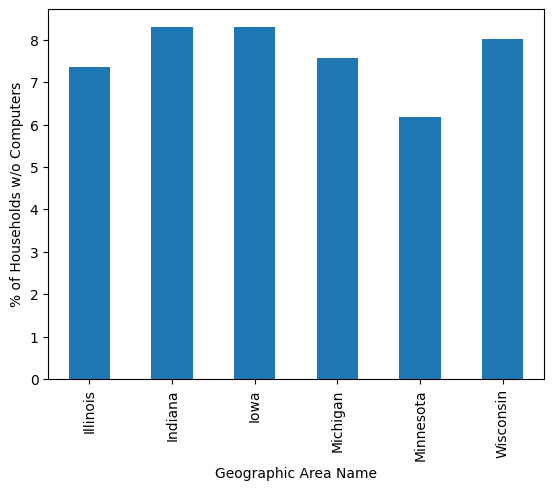

In [24]:
#Q22
import matplotlib.pyplot as plt

states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
percentages = {}
for state in states:
    no_computer_estimate = years[2021].at[state, "Estimate!!Total!!No Computer"]
    total_estimate = years[2021].at[state, "Estimate!!Total"]
    
    percentage = (no_computer_estimate / total_estimate) * 100
    percentages[state] = round(percentage, 2)

s = pd.Series(percentages)
s.plot.bar()
plt.ylabel("% of Households w/o Computers")
plt.xlabel("Geographic Area Name")

plt.show()


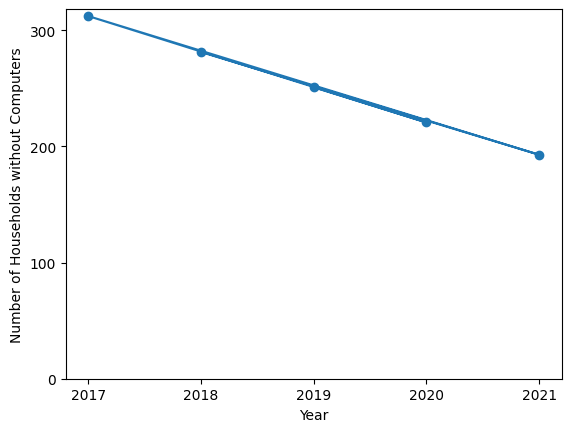

In [25]:
#Q23

no_comp = {year: df.at['Wisconsin', 'Estimate!!Total!!No Computer']/1000 for year, df in years.items()}
plt.plot(list(no_comp.keys()), list(no_comp.values()), marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Households without Computers')
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.yticks([0,100,200,300])
plt.show()

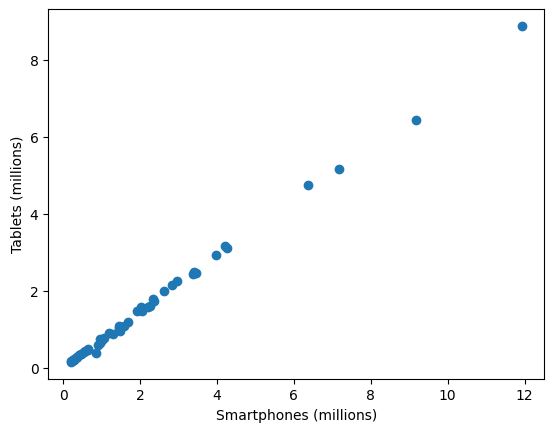

In [26]:
#Q24
df_2021 = years[2021]
smartphones = df_2021["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"] / 1e6
tablets = df_2021["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"] / 1e6

plt.scatter(smartphones, tablets)
plt.ylabel("Tablets (millions)")
plt.xlabel("Smartphones (millions)")

plt.show()

In [27]:
#Q25
import subprocess

output = subprocess.check_output(['git', 'log'], cwd='/home/erobl/cs320/projects/p1/flask').decode('utf-8')
line = output.split('\n')
first_line = line[0]
first_line

'commit f878919753a909e45b2d5448aa175f4f9129ff24'

In [28]:
#Q26
commit = [line.split(' ')[1] for line in line if line.startswith('commit ')]
first10_commits = commit[-10:]
first10_commits


['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [29]:
#Q27
commit100 = commit[-100]
subprocess.check_output(["git", "checkout", commit100], cwd="/home/erobl/cs320/projects/p1/flask/")

#read herre
with open("/home/erobl/cs320/projects/p1/flask/README", "r") as file:
    readme_contents = file.read()
readme_contents

HEAD is now at f8789197 With -> with in headline


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [30]:
#Q28
usernames = []
for line in output.splitlines():
    if "Merge pull request" in line and "/" in line:
        parts = line.split()
        username_index = parts.index("Merge") + 3
        username = parts[username_index].split('/')[0]
        usernames.append(username)
user_counts = {'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}
for user in usernames:
    user_counts[user] = user_counts.get(user, 0) + 1
filtered_counts = {user: count for user, count in user_counts.items() if count >= 10}

filtered_counts

{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [31]:
#Q29
#check_output(["pip3", "instal"])
try:
    msg = subprocess.check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output
msg.decode("utf-8")

'ERROR: unknown command "instal" - maybe you meant "install"\n'

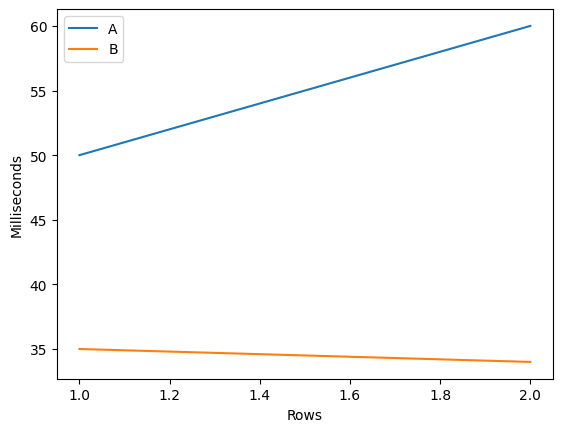

In [32]:
#Q30
import time
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])

t0 = time.time()
# HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
for row in df.iterrows():
    pass
t1 = time.time()

times_df = pd.DataFrame(dtype=float)
times_df.at[1, "A"] = 50
times_df.at[2, "A"] = 60
times_df.at[1, "B"] = 35
times_df.at[2, "B"] = 34

graph = times_df.plot.line()
graph.set_xlabel("Rows")
graph.set_ylabel("Milliseconds")
plt.show()


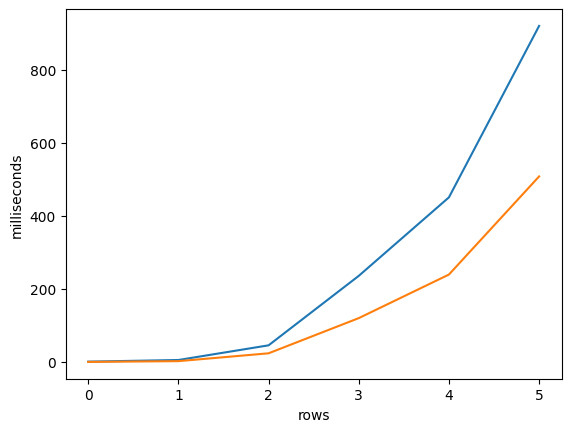

<function __main__.measure_time(rows)>

In [33]:
#Q31
import numpy as np
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])
def measure_time(rows):
    df = rand_df(rows)
    
    # Measure time for loc
    t0 = time.time()
    total_loc = 0
    for idx in df.index:
        for col in df.columns:
            total_loc += df.loc[idx, col]
    t_loc = time.time() - t0
    
    t0 = time.time()
    total_at = 0
    for idx in df.index:
        for col in df.columns:
            total_at += df.at[idx, col]
    t_at = time.time() - t0
    
    return t_loc * 1000, t_at * 1000
sizes = [10, 100, 1000, 5000, 10000, 20000]
loc_times = []
at_times = []

for s in sizes:
    t_loc, t_at = measure_time(s)
    loc_times.append(t_loc)
    at_times.append(t_at)

plt.plot(loc_times, label="loc")
plt.plot(at_times, label="at")
plt.xlabel("rows")
plt.ylabel("milliseconds")
plt.show()

measure_time

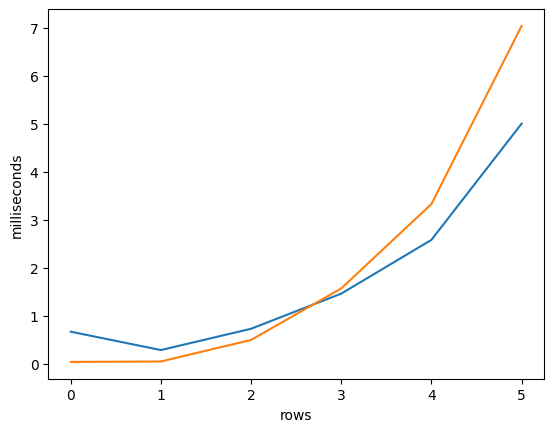

<function __main__.measure_time(rows)>

In [34]:
#Q32
    
def laugh(x):
    return "qwerty" * x

def measure_time(rows):
    df = rand_df(rows)
    
    # Measure time for .apply()
    t0 = time.time()
    result_apply = df["A"].apply(laugh).tolist()
    t_apply = time.time() - t0
    
    # Measure time for loop
    t0 = time.time()
    result_loop = []
    for val in df["A"]:
        result_loop.append(laugh(val))
    t_loop = time.time() - t0
    
    return t_apply * 1000, t_loop * 1000
sizes = [10, 100, 1000, 5000, 10000, 20000]
apply_times = []
loop_times = []
for s in sizes:
    t_apply, t_loop = measure_time(s)
    apply_times.append(t_apply)
    loop_times.append(t_loop)
    
plt.plot(apply_times, label="apply")
plt.plot(loop_times, label="loop")
plt.xlabel("rows")
plt.ylabel("milliseconds")
plt.show()

measure_time